In [ ]:
import numpy as np
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataPath = '/content/drive/MyDrive/Colab Notebooks/Dataset'
dataset_path = os.listdir('/content/drive/MyDrive/Colab Notebooks/Dataset')

print (dataset_path)  #what kinds of classes are in this dataset

print("Types of classes labels found: ", len(dataset_path))

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/Dataset'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Found 670 images belonging to 3 classes.
Found 195 images belonging to 3 classes.
Found 92 images belonging to 3 classes.
258076736/258076736 [==============================] - 1s 0us/step
Epoch 1/40
42/42 [==============================] - 244s 5s/step - loss: 0.6022 - accuracy: 0.7701 - val_loss: 0.8076 - val_accuracy: 0.7590
Epoch 2/40
42/42 [==============================] - 17s 408ms/step - loss: 0.4562 - accuracy: 0.8179 - val_loss: 0.7022 - val_accuracy: 0.7590
Epoch 3/40
42/42 [==============================] - 18s 429ms/step - loss: 0.4076 - accuracy: 0.8358 - val_loss: 0.6650 - val_accuracy: 0.7590
Epoch 4/40
42/42 [==============================] - 17s 406ms/step - loss: 0.3822 - accuracy: 0.8433 - val_loss: 0.7769 - val_accuracy: 0.7590
Epoch 5/40
42/42 [==============================] - 17s 396ms/step - loss: 0.3750 - accuracy: 0.8418 - val_loss: 0.7868 - val_accuracy: 0.7590
Epoch 6/40
42/42 [==============================] - 17s 403ms/step - loss: 0.3628 - accuracy: 0.85

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


13/13 [==============================] - 2s 177ms/step
Validation Set Classification Report:
               precision    recall  f1-score   support

      caries       0.76      1.00      0.86       148
 deep caries       0.00      0.00      0.00         7
        null       0.00      0.00      0.00        40

    accuracy                           0.76       195
   macro avg       0.25      0.33      0.29       195
weighted avg       0.58      0.76      0.65       195



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


6/6 [==============================] - 1s 181ms/step

Test Set Confusion Matrix:
 [[75  0  1]
 [ 3  0  0]
 [13  0  0]]


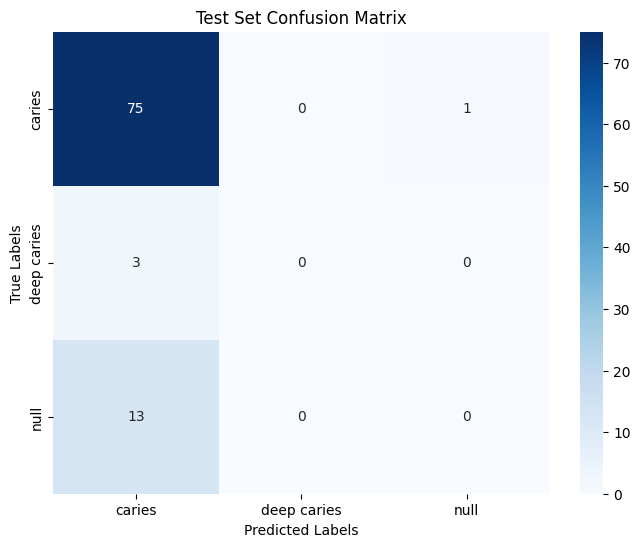

13/13 [==============================] - 2s 177ms/step

Validation Set Confusion Matrix:
 [[148   0   0]
 [  7   0   0]
 [ 40   0   0]]


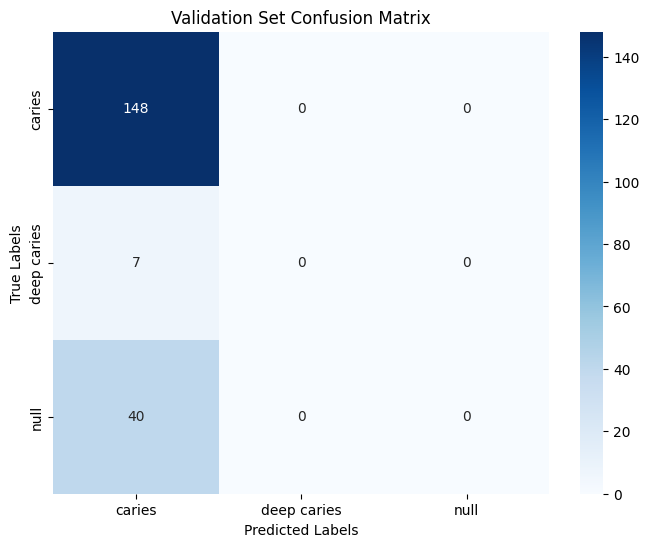

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ... (previous code)

from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report

# Veri yolu ve diğer parametreleri tanımlayın
data_dir = "/content/drive/MyDrive/Colab Notebooks/Dental Caries Classification.v1i.folder"
img_size = (224, 224)  # Resim boyutları
batch_size = 16  # Batch boyutu

# Veri artırma işlemi
train_datagen = ImageDataGenerator(
     rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Eğitim verisi yükleyici
train_generator = train_datagen.flow_from_directory(
    data_dir + "/train",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Doğrulama verisi yükleyici
valid_generator = valid_datagen.flow_from_directory(
    data_dir + "/valid",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Test verisi yükleyici
test_generator = test_datagen.flow_from_directory(
    data_dir + "/test",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# EfficientNetB7 modelini kullanarak önceden eğitilmiş bir model oluşturun
base_model = EfficientNetB7(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# Base modelin katmanlarını dondurma
for layer in base_model.layers:
    layer.trainable = False

# Oluşturduğumuz EfficientNetB7 modelini kullanarak yeni bir model oluşturun
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))  # 3 sınıf için çıkış katmanı

# Modeli derleyin
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Modeli eğitin
history = model.fit(train_generator, epochs=40, validation_data=valid_generator)

# Test seti üzerinde modeli değerlendirin
test_loss, test_acc = model.evaluate(test_generator)
print(f"\nTest accuracy: {test_acc}")

# Validation seti üzerinde modeli değerlendirin
valid_loss, valid_acc = model.evaluate(valid_generator)
print(f"Validation accuracy: {valid_acc}")

# Predictions on the test set
test_predictions = model.predict(test_generator)

# Convert predictions to class labels
predicted_classes_test = [round(x) for x in test_predictions.argmax(axis=-1)]

# Get true labels for the test set
true_labels_test = test_generator.classes

# Print classification report for the test set
class_names = list(train_generator.class_indices.keys())
report_test = classification_report(true_labels_test, predicted_classes_test, target_names=class_names)
print("\nTest Set Classification Report:\n", report_test)

# Predictions on the validation set
valid_predictions = model.predict(valid_generator)

# Convert predictions to class labels for the validation set
predicted_classes_valid = [round(x) for x in valid_predictions.argmax(axis=-1)]

# Get true labels for the validation set
true_labels_valid = valid_generator.classes

# Print classification report for the validation set
report_valid = classification_report(true_labels_valid, predicted_classes_valid, target_names=class_names)
print("Validation Set Classification Report:\n", report_valid)

# Predictions on the test set
test_predictions = model.predict(test_generator)

# Convert predictions to class labels
predicted_classes_test = [round(x) for x in test_predictions.argmax(axis=-1)]

# Get true labels for the test set
true_labels_test = test_generator.classes

# Calculate and print confusion matrix for the test set
conf_matrix_test = confusion_matrix(true_labels_test, predicted_classes_test)
print("\nTest Set Confusion Matrix:\n", conf_matrix_test)

# Plot confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Test Set Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Predictions on the validation set
valid_predictions = model.predict(valid_generator)

# Convert predictions to class labels for the validation set
predicted_classes_valid = [round(x) for x in valid_predictions.argmax(axis=-1)]

# Get true labels for the validation set
true_labels_valid = valid_generator.classes

# Calculate and print confusion matrix for the validation set
conf_matrix_valid = confusion_matrix(true_labels_valid, predicted_classes_valid)
print("\nValidation Set Confusion Matrix:\n", conf_matrix_valid)

# Plot confusion matrix for the validation set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_valid, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Validation Set Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [ ]:
Class_Indices = {'caries': 0, 'deep caries': 1, 'null': 2}

In [ ]:
from tensorflow.keras.models import load_model

model = load_model("/content/drive/MyDrive/Colab Notebooks/BestModel.h5")

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = "/content/drive/MyDrive/Colab Notebooks/Dental Caries Classification.v1i.folder"
img_size = (224, 224)  # Resim boyutları
test_datagen = ImageDataGenerator(rescale=1./255)
# Test verisi yükleyici
test_generator = test_datagen.flow_from_directory(
    data_dir + "/test",
    target_size=img_size,
    batch_size=16,
    class_mode='categorical'
)


# Load the trained model
loaded_model = load_model("/content/drive/MyDrive/Colab Notebooks/BestModel.h5")  # Replace with the actual path to your saved model

# Test set predictions
test_predictions = loaded_model.predict(test_generator)

# Convert predictions to class labels
predicted_classes = [round(x) for x in test_predictions.argmax(axis=-1)]

# Get true labels
true_labels = test_generator.classes

# Get class names
class_names = list(Class_Indices.keys())

# Print classification report
report = classification_report(true_labels, predicted_classes, target_names=class_names)
print("Classification Report:\n", report)

# Evaluate model on the test set
test_loss, test_accuracy = loaded_model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Found 92 images belonging to 3 classes.
6/6 [==============================] - 6s 180ms/step
Classification Report:
               precision    recall  f1-score   support

      caries       0.00      0.00      0.00        76
 deep caries       0.00      0.00      0.00         3
        null       0.14      1.00      0.25        13

    accuracy                           0.14        92
   macro avg       0.05      0.33      0.08        92
weighted avg       0.02      0.14      0.03        92



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


6/6 [==============================] - 7s 191ms/step - loss: 1.6084 - accuracy: 0.1413
Test Loss: 1.6084
Test Accuracy: 0.1413


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Test etmek istediğiniz görüntünün yolu
test_image_path = "/content/drive/MyDrive/Colab Notebooks/Dataset/caries/45_jpg.rf.3c053fdeb48dbf35c431de9e21076e2f.jpg"

# Görüntüyü yükleyin ve boyutlandırın
img = image.load_img(test_image_path, target_size=(224, 224))

# Görüntüyü diziye çevirin
img_array = image.img_to_array(img)

# Resmi genişletin (batch boyutu için)
img_array = np.expand_dims(img_array, axis=0)

# Görüntüyü modelle tahmin et
predictions = model.predict(img_array)

# En yüksek olasılığa sahip sınıfın indeksini bulun
predicted_class_index = np.argmax(predictions[0])

# Sınıf indeksini sınıf etiketlerinden çıkarın
class_labels = Class_Indices
predicted_class_label = [k for k, v in class_labels.items() if v == predicted_class_index][0]

# Tahmin edilen sınıfa ait olasılığı bulun
confidence = predictions[0][predicted_class_index]

# Tahmin sonucunu ve güveni yazdırın
print(f"Tahmin: {predicted_class_label}")
print(f"Güven: {confidence}")


1/1 [==============================] - 0s 60ms/step
Tahmin: caries
Güven: 0.6158679723739624


In [ ]:
model.save('BestModelEpoch40V2.h5', save_format='h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save("BestModelEpoch40.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from flask import Flask, request, jsonify
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

app = Flask(__name__)

# Eğittiğiniz modelinizi yükleyin
model = load_model('/content/drive/MyDrive/Colab Notebooks/BestModelEpoch40.h5')

@app.route('/')
def predict():
    try:
        # Gelen JSON verisini alın
        data = request.get_json()

        # Gelen veriyi modele uygun formata getirin (örneğin, boyutlandırma ve normalizasyon)
        img_path = data['/content/drive/MyDrive/Colab Notebooks/Dataset/deep caries/-11-_jpg.rf.764aa78ea455fc820f5557339d3571b0.jpg']
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0  # Örnek olarak normalizasyon

        # Tahmin yapın
        predictions = model.predict(img_array)

        # Tahmin sonuçlarını JSON formatında döndürün
        return jsonify({'predictions': predictions.tolist()})

    except Exception as e:
        return jsonify({'error': str(e)})

if __name__ == '__main__':
    # Uygulamayı çalıştırın
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
from flask import Flask, request, jsonify
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

app = Flask(__name__)

@app.route('/')
def home():
  return "Home"

if __name__ == '__main__':
    # Uygulamayı çalıştırın
    app.run(debug=True)



 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
